Anjali Agarwal (B20AI051)
Arjun Singh (B20EE009)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
# For ML models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC ,SVR
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV



In [ ]:

data = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# missing the missing values
fig = px.imshow(data.isna().transpose(),color_continuous_scale="Blues")
fig.show()

Column Statistics of numerical data

In [ ]:
data.describe()[1:][['age','avg_glucose_level','bmi']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
age,43.226614,22.612647,0.080000,25.000000,45.000000,61.000000,82.000000
avg_glucose_level,106.147677,45.283560,55.120000,77.245000,91.885000,114.090000,271.740000
bmi,28.893237,7.854067,10.300000,23.500000,28.100000,33.100000,97.600000


COlumn statistics of Categorical Data

In [ ]:
fig = make_subplots(
    rows=4, cols=2, subplot_titles=("gender", "hypertension",
                                    "heart_disease","ever_married",
                                    "work_type", "Residence_type",
                                    'smoking_status', 'stroke'),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)


colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(data['gender'].value_counts().index),
                     values=[x for x in data['gender'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(data['hypertension'].value_counts().index),
                     values=[x for x in data['hypertension'].value_counts()],
                     textinfo='label+percent', hole=.35,
                     marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(data['heart_disease'].value_counts().index),
                     values=[x for x in data['heart_disease'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(data['ever_married'].value_counts().index),
                     values=[x for x in data['ever_married'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(data['work_type'].value_counts().index),
                     values=[x for x in data['work_type'].value_counts()],
                     textinfo='label+percent', hole=.35,
                     marker_colors=colours),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(data['Residence_type'].value_counts().index),
                     values=[x for x in data['Residence_type'].value_counts()],
                     textinfo='label+percent', hole=.35,
                     marker_colors=colours),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(data['smoking_status'].value_counts().index),
                     values=[x for x in data['smoking_status'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
              row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(data['stroke'].value_counts().index),
                     values=[x for x in data['stroke'].value_counts()],
                     rotation=-45, textinfo='label+percent', hole=.35,
                     marker_colors=colours),
              row=4, col=2)

fig.update_layout(height=2000, font=dict(size=14), showlegend=False)

fig.show()

In [ ]:
def encode_categorical_features(data):
    Encoder = LabelEncoder()
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = Encoder.fit_transform(data[col])

    return data

dataset = encode_categorical_features(data)

In [ ]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


analysing age distribution 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



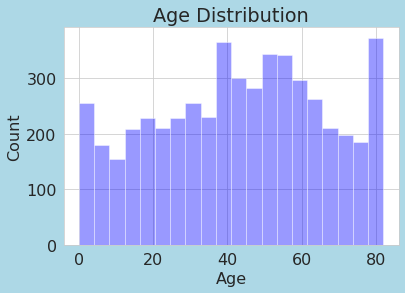

In [ ]:
plt.rcParams['font.size'] = '16'
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=[6,4])
fig.patch.set_facecolor('lightblue')
sns.distplot(dataset['age'], bins=20, kde=False, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

analysing bmi distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



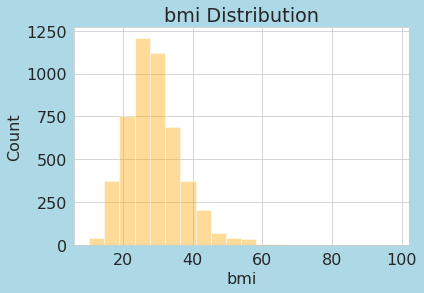

In [ ]:
plt.rcParams['font.size'] = '16'
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=[6,4])
fig.patch.set_facecolor('lightblue')
sns.distplot(dataset['bmi'], bins=20, kde=False, color='orange')
plt.title('bmi Distribution')
plt.xlabel('bmi')
plt.ylabel('Count')
plt.show()

analysing smoking status 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



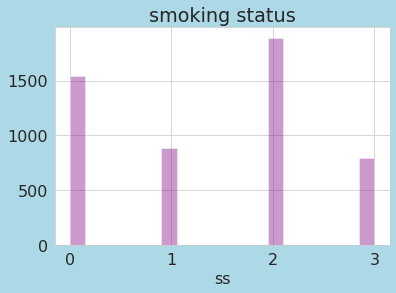

In [ ]:
plt.rcParams['font.size'] = '16'
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=[6,4])
fig.patch.set_facecolor('lightblue')
sns.distplot(dataset['smoking_status'], bins=20, kde=False, color='purple')
plt.title('smoking status')
plt.xlabel('ss')
#0 = formerly smoked 
#1 = never smoked 
#2 = smokes
#3 = unknown 
# plt.ylabel('')
plt.show()

unecessary column as a lot of values are unkown 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'working status')

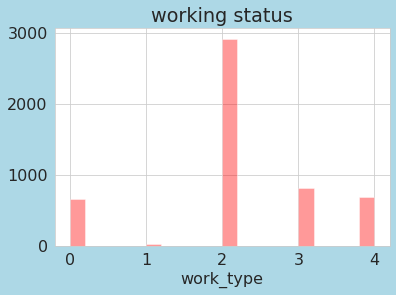

In [ ]:
plt.rcParams['font.size'] = '16'
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=[6,4])
fig.patch.set_facecolor('lightblue')
sns.distplot(dataset['work_type'], bins=20, kde=False, color='red')
plt.title('working status')
#0 =private
#1 = self-employed 
# 2 = govt_job
# 3 = children
# 4 = never worked



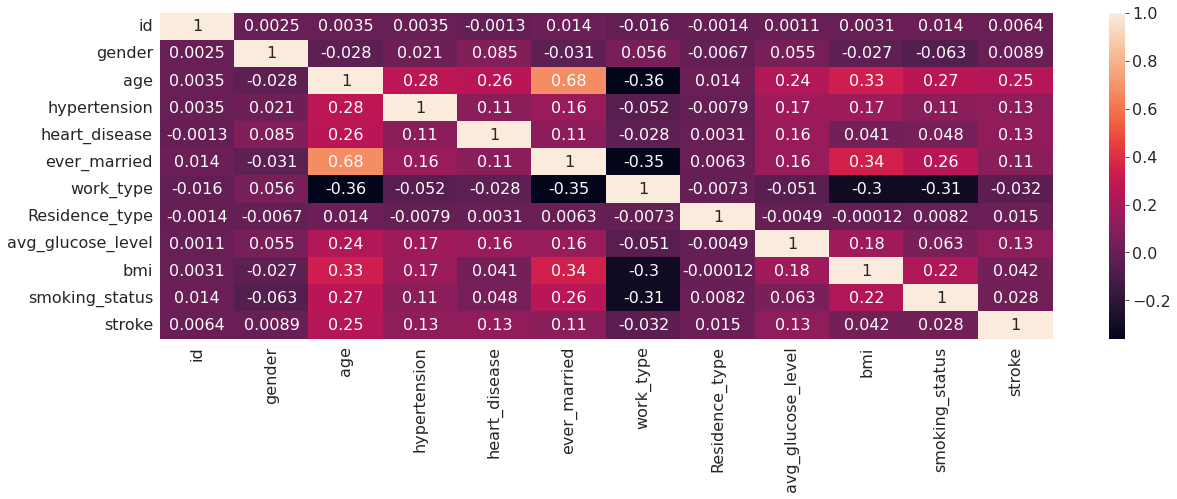

In [ ]:
plt.rcParams["figure.figsize"] = (20,6)
sns.heatmap(dataset.corr(), annot=True, linewidths=0)


In [ ]:
def clean_dataset(data):
    assert isinstance(data, pd.DataFrame), "df needs to be a pd.DataFrame"
    data.dropna(inplace=True)
    indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(1)
    return data[indices_to_keep].astype(np.float64)

dataset_2 = clean_dataset(dataset)
  

In [ ]:
stroke=list(dataset_2["stroke"])


In [ ]:
dataset_2.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [ ]:
X = dataset_2.drop(['stroke'], axis=1)
y = dataset_2['stroke']
#splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3436, 11)
(1473, 11)
(3436,)
(1473,)


In [ ]:
#using smote to remove imbalanced data
from imblearn.over_sampling import SMOTE 
# sm = SMOTE(random_state=42)
oversample = SMOTE()
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)
# X_train_res, y_train_res = SMOTE.fit_sample(X_train, y_train)

In [ ]:
X_train_res.shape

(6598, 11)

In [ ]:
y_train_res.shape

(6598,)

In [ ]:
pd.DataFrame(y_test).value_counts()

stroke
0.0       1401
1.0         72
dtype: int64

In [ ]:
pd.DataFrame(X_train_res).value_counts()

id            gender    age        hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level  bmi        smoking_status
84.000000     1.000000  55.000000  0.0           0.000000       1.000000      2.000000   1.000000        89.170000          31.500000  2.000000          1
51823.000000  1.000000  72.000000  0.0           0.000000       1.000000      3.000000   1.000000        123.080000         25.400000  3.000000          1
51935.000000  1.000000  16.000000  0.0           0.000000       0.000000      1.000000   1.000000        59.990000          28.200000  2.000000          1
51932.761200  0.801569  59.976467  0.0           0.000000       1.000000      1.603138   0.198431        184.209341         33.289570  1.198431          1
51917.118687  1.000000  64.868061  0.0           0.000000       1.000000      2.000000   0.327836        156.474270         31.811746  1.327836          1
                                                                           

In [ ]:
pd.DataFrame(y_train_res).value_counts()

stroke
0.0       3299
1.0       3299
dtype: int64

In [ ]:
def models(a,b,X_test, y_test):
    Accuracy = []
    F1_score = []
    model = []

    model.append(LogisticRegression(solver='liblinear', multi_class='ovr'))
    model.append(KNeighborsClassifier())
    model.append(SVC(gamma='auto'))
    model.append(RandomForestClassifier(n_estimators=100))
    model.append(DecisionTreeClassifier())
    model.append(AdaBoostClassifier())
    model.append(BaggingClassifier())
    model.append(GradientBoostingClassifier())
    model.append(XGBClassifier())
    model.append(LGBMClassifier())

    for i in model:
      i.fit(a,b)
      y_pred = i.predict(X_test)
      Accuracy.append(accuracy_score(y_test,y_pred))
      F1_score.append(f1_score(y_test,y_pred))

      print("model :" , i ,"accuracy score :",accuracy_score(y_test,y_pred) )

    # return models, Accuracy, F1_score

# print(models(X_train_res, y_train_res))
models(X_train_res, y_train_res , X_test ,y_test)


model : LogisticRegression(multi_class='ovr', solver='liblinear') accuracy score : 0.7379497623896809
model : KNeighborsClassifier() accuracy score : 0.6965376782077393
model : SVC(gamma='auto') accuracy score : 0.9511201629327902
model : RandomForestClassifier() accuracy score : 0.9484046164290564
model : DecisionTreeClassifier() accuracy score : 0.8981670061099797
model : AdaBoostClassifier() accuracy score : 0.9409368635437881
model : BaggingClassifier() accuracy score : 0.9422946367956552
model : GradientBoostingClassifier() accuracy score : 0.9490835030549898
model : XGBClassifier() accuracy score : 0.9504412763068567
model : LGBMClassifier() accuracy score : 0.9497623896809233


Best classifier models:

1. SVC
2. Random forest
3. Adaboost
4. XGB 
5. LGBM

moving forward with these classifiers



In [ ]:
from sklearn.decomposition import PCA
      

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset_2)
pcadf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [ ]:
pcadf["stroke"]=stroke
pcadf

,principal component 1,principal component 2,stroke
0,28018.311587,126.256381,1.0
1,5952.313133,6.637907,1.0
2,-23117.687452,65.885698,1.0
3,35399.312225,73.931631,1.0
4,-19604.687957,85.533465,1.0
...,...,...,...
4904,22884.313837,-6.902186,0.0
4905,-7808.687144,25.882470,0.0
4906,17341.313880,-22.936121,0.0
4907,-479.687396,61.342387,0.0


In [ ]:
pcadf.isnull().any()

principal component 1    False
principal component 2    False
stroke                   False
dtype: bool

In [ ]:
liststr=list(pcadf["stroke"].unique())
liststr

[1.0, 0.0]

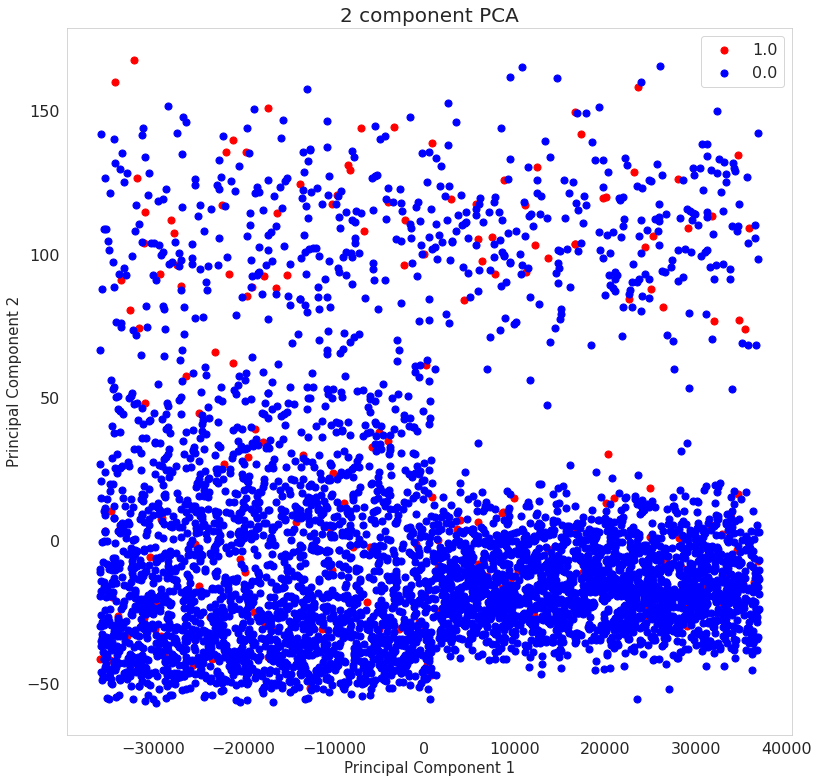

In [ ]:
fig = plt.figure(figsize = (13,13))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1.0, 0.0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pcadf['stroke'] == target
    ax.scatter(pcadf.loc[indicesToKeep, 'principal component 1']
               , pcadf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [ ]:
x=pcadf.iloc[:,:-1]
y=pcadf.iloc[:,-1]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
X_train_2.shape


(3436, 2)

In [ ]:
X_test_2.shape

(1473, 2)

In [ ]:
y_train_2.shape

(3436,)

In [ ]:
y_test_2.shape 

(1473,)

In [ ]:
from imblearn.over_sampling import SMOTE 
# sm = SMOTE(random_state=42)
oversample = SMOTE()
X_train_res_2, y_train_res_2 = oversample.fit_resample(X_train_2, y_train_2)

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [ ]:
def models2(a,b,X_test, y_test):
    Accuracy = []
    F1_score = []
    model = []

    model.append(SVC(gamma='auto'))
    model.append(RandomForestClassifier(n_estimators=100))
    model.append(AdaBoostClassifier())
    model.append(XGBClassifier())
    model.append(LGBMClassifier())

    cvscorelist=[]

    for i in model:
      lis=[]
      i.fit(a,b)
      y_pred = i.predict(X_test)
      Accuracy.append(accuracy_score(y_test,y_pred))
      F1_score.append(f1_score(y_test,y_pred))

      print("model :" , i ,"accuracy score :",accuracy_score(y_test,y_pred))
      lis=[cross_val_score(i, a, b, cv=5)]
      cvscorelist.append(lis)
    
    return cvscorelist



In [ ]:
cvlist=models2(X_train_res_2, y_train_res_2 , X_test_2 , y_test_2)

model : SVC(gamma='auto') accuracy score : 0.9470468431771895
model : RandomForestClassifier() accuracy score : 0.7467752885268161
model : AdaBoostClassifier() accuracy score : 0.7040054310930075
model : XGBClassifier() accuracy score : 0.6843177189409368
model : LGBMClassifier() accuracy score : 0.7243720298710116


In [ ]:
cvlist

[[array([0.56666667, 0.56212121, 0.54848485, 0.55041698, 0.55193328])],
 [array([0.80681818, 0.79393939, 0.78484848, 0.80212282, 0.79226687])],
 [array([0.66818182, 0.6969697 , 0.68863636, 0.70887036, 0.68612585])],
 [array([0.71590909, 0.73030303, 0.75378788, 0.75587566, 0.74677786])],
 [array([0.76666667, 0.78484848, 0.77727273, 0.79150872, 0.78089462])]]

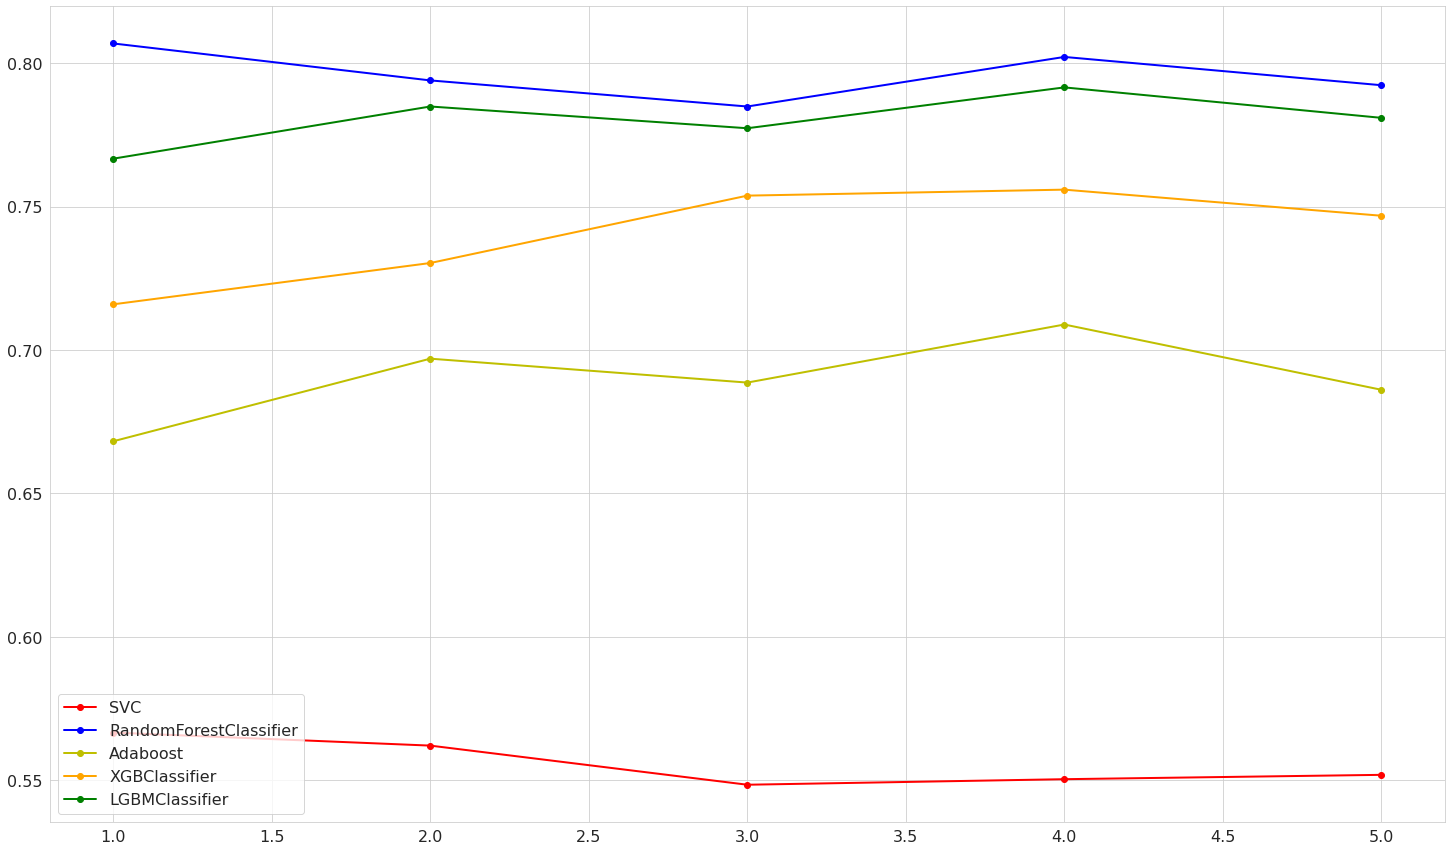

In [ ]:
import matplotlib.pyplot as plt
m = [1,2,3,4,5]
modelnames=["SVC" , "RandomForestClassifier" , "Adaboost" , "XGBClassifier" ,"LGBMClassifier"]
colors=['r','b','y','orange','g']
plt.figure(figsize=(25,15))
for i in range(len(modelnames)):
      plt.plot(m,cvlist[i][0] , c=colors[i] , label=modelnames[i], linewidth=2, marker='o')
plt.legend()
plt.show()


Accuracy of each model decreased after applying PCA

applying lda on the dataset

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train3 = lda.fit_transform(X_train, y_train)
X_test3 = lda.transform(X_test)



In [ ]:
cvlist2=models2(X_train3, y_train , X_test3 , y_test)

model : SVC(gamma='auto') accuracy score : 0.9511201629327902
model : RandomForestClassifier() accuracy score : 0.9253224711473184
model : AdaBoostClassifier() accuracy score : 0.9511201629327902
model : XGBClassifier() accuracy score : 0.9497623896809233
model : LGBMClassifier() accuracy score : 0.9511201629327902


In [ ]:
cvlist2

[[array([0.95930233, 0.96069869, 0.96069869, 0.96069869, 0.95924309])],
 [array([0.94186047, 0.93740902, 0.93304221, 0.92430859, 0.930131  ])],
 [array([0.95930233, 0.95924309, 0.96069869, 0.96069869, 0.95924309])],
 [array([0.95494186, 0.96069869, 0.95924309, 0.96069869, 0.95924309])],
 [array([0.95639535, 0.96069869, 0.96069869, 0.96069869, 0.95924309])]]

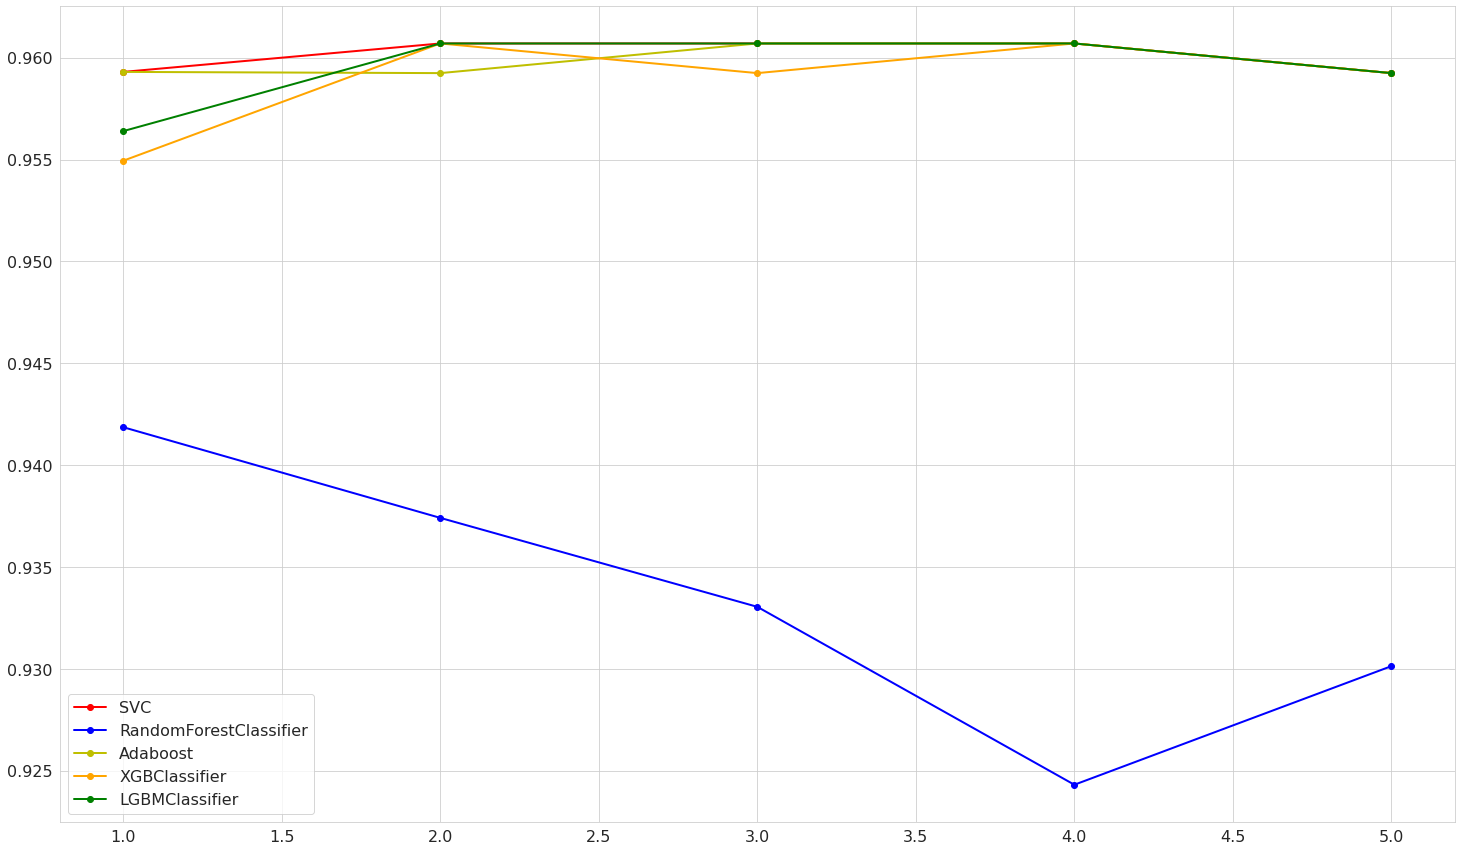

In [ ]:
import matplotlib.pyplot as plt
m = [1,2,3,4,5]
modelnames=["SVC" , "RandomForestClassifier" , "Adaboost" , "XGBClassifier" ,"LGBMClassifier"]
colors=['r','b','y','orange','g']
plt.figure(figsize=(25,15))
for i in range(len(modelnames)):
      plt.plot(m,cvlist2[i][0] , c=colors[i] , label=modelnames[i], linewidth=2, marker='o')
plt.legend()
plt.show()

Now its clear that xgb,adaboost and SVC are performing better so moving forward with these models

# hyperparameter tunning

In [ ]:
del dataset_2["id"]
del dataset_2["smoking_status"]

In [ ]:
del dataset_2["work_type"]

In [ ]:
X = dataset_2.drop(['stroke'], axis=1)
y = dataset_2['stroke']
#splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE()
x_resample, y_resample = smote.fit_resample(X_train, y_train.ravel())


In [ ]:
model_comparison = {}

In [ ]:
def show3D(searcher, grid_param_1, grid_param_2, name_param_1, name_param_2, rot=0):
    scores_mean = searcher.cv_results_['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_1), len(grid_param_2)).T

    print('Best params = {}'.format(searcher.best_params_))
    print('Best score = {}'.format(scores_mean.max()))

    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx, :], '-o', label=name_param_2 + ': ' + str(val))

    ax.tick_params(axis='x', rotation=rot)
    ax.set_title('Grid Search Scores')
    ax.set_xlabel(name_param_1)
    ax.set_ylabel('CV score')
    ax.legend(loc='best')
    ax.grid('on')



SVC model hypertunning

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
parameters = {'C': [1,2,3,4,5,6], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svc_model = SVC()

clf2 = GridSearchCV(svc_model, parameters)
print("Searching for best hyperparameters ...")
clf2.fit(X_train, y_train)
print(f'Best Hyperparameters: {clf2.best_params_}')

y_pred = clf2.predict(X_test)
model_comparison['SVC'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'C': 1, 'kernel': 'linear'}


              precision    recall  f1-score   support

         0.0      0.951     1.000     0.975      1401
         1.0      1.000     0.000     0.000        72

    accuracy                          0.951      1473
   macro avg      0.976     0.500     0.487      1473
weighted avg      0.954     0.951     0.927      1473



Best params = {'C': 1, 'kernel': 'linear'}
Best score = 0.9601282962662063


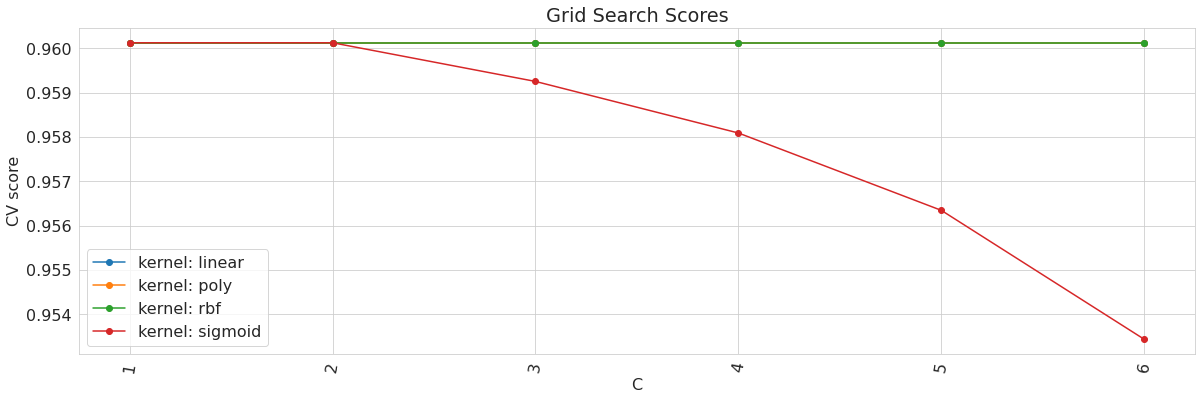

In [ ]:
grid_param_1 =[1,2,3,4,5,6]
grid_param_2 = ['linear', 'poly', 'rbf', 'sigmoid']


show3D(clf2, grid_param_1, grid_param_2, 'C', 'kernel', 80)

XGboost Model

In [ ]:
import xgboost as xgb
parameters = {'n_estimators': [80, 100, 120], 'max_depth':[16, 18, 20]}

xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

clf = GridSearchCV(xgboost, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_resample, y_resample)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(X_test)
model_comparison['XGBoost'] = [accuracy_score(y_test, y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 18, 'n_estimators': 120}


              precision    recall  f1-score   support

         0.0      0.952     0.984     0.968      1401
         1.0      0.115     0.042     0.061        72

    accuracy                          0.938      1473
   macro avg      0.534     0.513     0.514      1473
weighted avg      0.911     0.938     0.923      1473



Best params = {'max_depth': 18, 'n_estimators': 120}
Best score = 0.9716627610448686


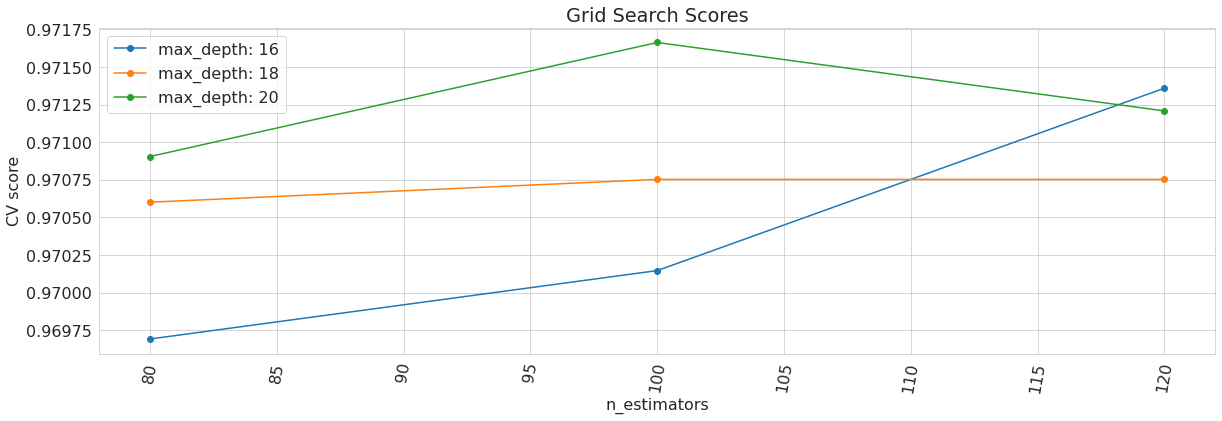

In [ ]:


grid_param_1 = [80,100,120]
grid_param_2 = [16, 18, 20]


show3D(clf, grid_param_1, grid_param_2, 'n_estimators', 'max_depth', 80)



In [ ]:
parameters = {'n_estimators': [160,180,200,220], 'max_depth':[16,18,20,22,24]}

rf = RandomForestClassifier()

clf3 = GridSearchCV(rf, parameters)
print("Searching for best hyperparameters ...")
clf3.fit(x_resample, y_resample)
print(f'Best Hyperparameters: {clf3.best_params_}')

y_pred = clf3.predict(X_test)
model_comparison['RandomForestClassifier'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 24, 'n_estimators': 200}


              precision    recall  f1-score   support

         0.0      0.953     0.990     0.971      1401
         1.0      0.176     0.042     0.067        72

    accuracy                          0.944      1473
   macro avg      0.565     0.516     0.519      1473
weighted avg      0.915     0.944     0.927      1473



Best params = {'max_depth': 24, 'n_estimators': 200}
Best score = 0.9748451535828337


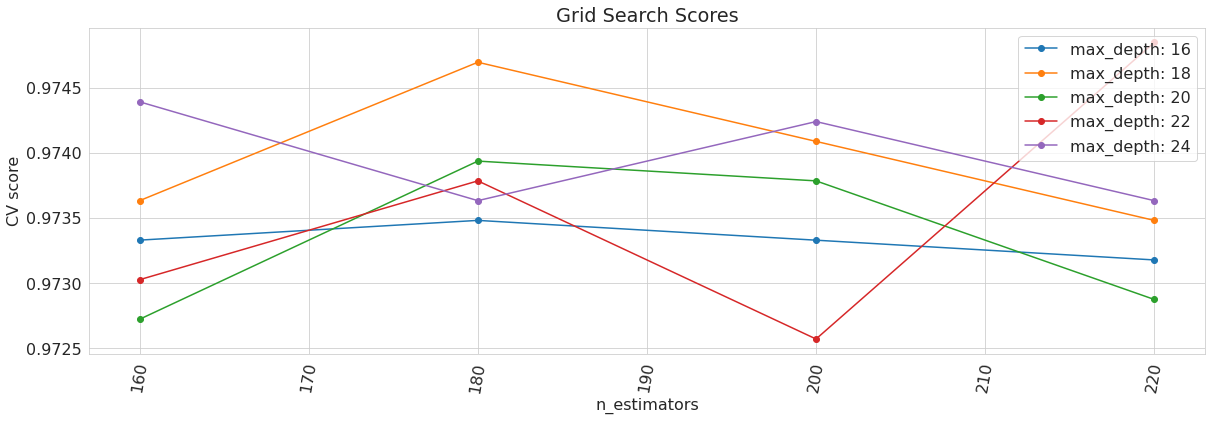

In [ ]:

grid_param_1 = [160,180,200,220]
grid_param_2 = [16,18,20,22,24]


show3D(clf3, grid_param_1, grid_param_2, 'n_estimators', 'max_depth', 80)

In [ ]:
import shap

In [ ]:
rf = RandomForestClassifier(max_depth=20 , n_estimators=200)
rf.fit(x_resample, y_resample)
pred=rf.predict(X_test)

In [ ]:
explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(X_test)

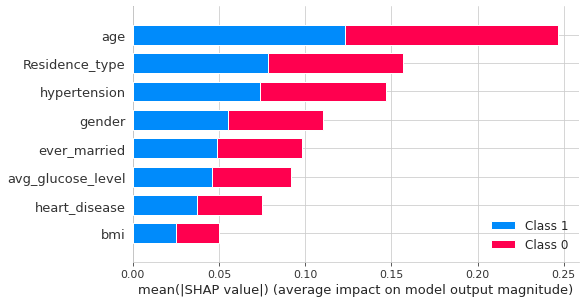

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar', plot_size='auto')

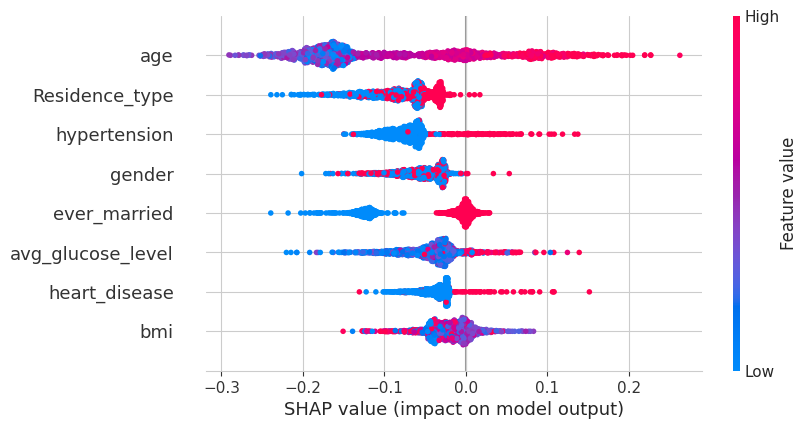

In [ ]:
plt.figure(figsize=[10, 8], dpi=100)
shap.summary_plot(shap_values[1], X_test)

In [ ]:
X_test


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
4336,1.0,80.0,0.0,1.0,1.0,0.0,125.32,32.9
3709,0.0,42.0,0.0,0.0,0.0,1.0,84.03,31.4
964,1.0,66.0,1.0,0.0,1.0,0.0,74.90,32.1
2647,1.0,29.0,0.0,0.0,1.0,1.0,102.40,26.9
3262,1.0,47.0,0.0,0.0,1.0,0.0,88.49,22.2
...,...,...,...,...,...,...,...,...
3542,0.0,44.0,0.0,0.0,1.0,1.0,82.33,24.5
1586,0.0,41.0,0.0,0.0,1.0,1.0,91.93,24.7
2078,1.0,74.0,0.0,0.0,1.0,0.0,92.67,26.3
787,0.0,31.0,0.0,0.0,1.0,1.0,109.68,41.8


In [ ]:
arr=[[1,80,0,0,1,0,125,32]]
arr=np.array(arr)
arr = arr.astype(float)
arr


array([[  1.,  80.,   0.,   0.,   1.,   0., 125.,  32.]])

In [ ]:
gender=1.
age=80.
hypertension=0.
heart_disease=0.
ever_married=0.
Residence_type=0. 
avg_glucose_level=125. 
bmi=27.7

In [ ]:
  
dict ={'gender':[gender],
        'age':[age],
        'hypertension':[hypertension],
        'heart_disease':[heart_disease],
        'ever_married':[ever_married],
        'Residence_type':[Residence_type],
        'avg_glucose_level':[avg_glucose_level],
        'bmi':[bmi]} 

       
  
df = pd.DataFrame(dict)

In [ ]:
model = xgb.XGBClassifier(max_depth= 20,n_estimators= 120)
model.fit(x_resample,y_resample)

XGBClassifier(max_depth=20, n_estimators=120)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
p=model.predict(df)
p

array([0.])

In [ ]:
import pickle
with open('model.pkl' , 'wb') as files:
  pickle.dump(model, files)


In [ ]:
 X_test